In [387]:
import json
import os
import argparse
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy import stats
from datetime import datetime

import read_csv_to_dataframe as ecf
import pa_calculation_RT2 as pcRT
import pa_calculation_ML3 as pcML
from importlib import reload

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', 60)

In [438]:
# import data as csv
exp_version = '1'
dataclip = pd.read_csv('data/Experiment'+exp_version+'/dataclip.csv')

In [439]:
#print(ecf.getMapping(dataclip, 35))
#dataclip

In [440]:
#reload(ecf)
#ecf.getParticipantInfoExp8J(dataclip, 55)

In [441]:
#set up
reload(ecf)
dataframe1 = ecf.makeDataframe(dataclip, ecf.getParticipantInfoExp1)
dataframe1 = dataframe1.sort_values(by=['condition', 'status'], ascending=True)
dataframe1.reset_index(inplace = True, drop=True)

In [443]:
# ............................ ANONYMIZE AND Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [444]:
data = dataframe1.drop(columns=['WorkerId', 'hitId', 'assignmentId','datastring'])
data.apply(lambda x: (json.dumps(a) for a in x) if x.name in ['testingTrials', 'trainingTrials'] else x).to_csv('data/Experiment'+exp_version+'/dataframe_raw.csv', index_label='pid')


In [445]:
# ............................ CALCULATE PAIR AGREEMENT .....................................................
# ..........................................................................................
# ..........................................................................................

In [447]:
reload(pcML)

dataframe2 = pd.read_csv('data/Experiment'+exp_version+'/dataframe_raw.csv')
dataframe2 = dataframe2.apply(lambda x: (json.loads(a) for a in x) if x.name in ['testingTrials', 'trainingTrials', 'RTscores'] else x)

paML = pcML.get_agreement_sample(dataframe2.trainingTrials)
dataframe2['ML_pa_mean'] = paML['click_agreement_means_sample']
dataframe2['ML_pa_complete'] = paML['click_agreement_ratios_sample']

70

 Neweeew Trial

[3, 7, 8, 11, 12, 6, 10, 9, 4, 2, 1, 5, 0]
PA: 0.8333333333333334

 Neweeew Trial

[3, 4, 7, 8, 11, 12, 10, 9, 5, 6, 0]
PA: 1.0

 Neweeew Trial

[4, 7, 8, 11, 12, 3, 10, 9, 2, 1, 6, 5, 0]
PA: 1.0

 Neweeew Trial

[4, 3, 11, 12, 8, 7, 10, 9, 1, 2, 0]
PA: 1.0

 Neweeew Trial

[12, 11, 7, 8, 4, 3, 0]
PA: 1.0

 Neweeew Trial

[3, 7, 4, 8, 11, 12, 2, 1, 0]
PA: 1.0

 Neweeew Trial

[12, 7, 10, 9, 0]
PA: 0.5

 Neweeew Trial

[8, 6, 5, 4, 3, 11, 10, 9, 0]
PA: 0.6666666666666666

 Neweeew Trial

[8, 4, 3, 7, 11, 12, 6, 5, 10, 9, 2, 1, 0]
PA: 1.0

 Neweeew Trial

[11, 12, 7, 8, 4, 3, 2, 1, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 7, 8, 12, 11, 0]
PA: 1.0

 Neweeew Trial

[7, 8, 4, 11, 0]
PA: 1.0

 Neweeew Trial

[4, 12, 7, 3, 11, 0]
PA: 1.0

 Neweeew Trial

[11, 7, 8, 4, 3, 0]
PA: 1.0

 Neweeew Trial

[4, 3, 8, 11, 12, 0]
PA: 1.0

 Neweeew Trial

[7, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 11, 7, 12, 0]
PA: 1.0

 Neweeew Trial

[3, 8, 4, 11, 0]
PA: 1.0

 Neweeew Trial

[12, 7, 8, 3, 0]



 Neweeew Trial

[4, 8, 12, 10, 5, 1, 9, 2, 7, 3, 6, 11, 0]
PA: 0.5

 Neweeew Trial

[3, 4, 7, 8, 11, 12, 10, 9, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 7, 8, 11, 12, 6, 2, 10, 9, 5, 1, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 7, 8, 11, 12, 10, 9, 2, 1, 6, 5, 0]
PA: 1.0

 Neweeew Trial

[3, 7, 8, 12, 11, 4, 6, 10, 9, 5, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 8, 12, 11, 7, 10, 9, 2, 1, 6, 5, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 7, 8, 11, 12, 2, 1, 10, 6, 9, 0]
PA: 1.0

 Neweeew Trial

[0]
PA: 0.0

 Neweeew Trial

[5, 9, 0]
PA: 0.0

 Neweeew Trial

[1, 0]
PA: 0.0

 Neweeew Trial

[7, 8, 11, 12, 4, 3, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 7, 8, 11, 12, 0]
PA: 1.0

 Neweeew Trial

[3, 7, 11, 0]
PA: 1.0

 Neweeew Trial

[3, 4, 7, 0]
PA: 1.0

 Neweeew Trial

[3, 7, 0]
PA: 1.0

 Neweeew Trial

[8, 7, 4, 3, 12, 0]
PA: 1.0

 Neweeew Trial

[11, 0]
PA: 1.0

 Neweeew Trial

[3, 8, 12, 0]
PA: 1.0

 Neweeew Trial

[3, 7, 0]
PA: 1.0

 Neweeew Trial

[3, 8, 12, 4, 7, 0]
PA: 1.0

 Neweeew Trial

[4, 11, 8, 0]
PA: 1.0

 N

In [448]:
reload(pcRT)

k =  'end_nodes' 
n = -1  # -> consider all

paRT = pcRT.get_agreement_sample(dataframe2.testingTrials, k, n, pa_measure, et_mehod)
dataframe2['RT_pa_mean'] = paRT['click_agreement_means_sample']
dataframe2['RT_pa_complete'] = paRT['click_agreement_ratios_sample']
dataframe2['RT_et_complete'] = paRT['mean_run_lengths_sample']

paRT = pcRT.get_agreement_sample(dataframe2.testingTrials, k, 4, pa_measure, et_mehod)
dataframe2['RT_pa_meanFH'] = paRT['click_agreement_means_sample']

paRT = pcRT.get_agreement_sample(dataframe2.testingTrials, k, 1, pa_measure, et_mehod)
dataframe2['RT_pa_meanFT'] = paRT['click_agreement_means_sample']


 New Participant ------- 

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 7
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 0.0, 0.0, 0.0]
Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 200.0, 0.0, 0.0, 0.0]
Action: 10
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 200.0, 0.0, 0.0, 400.0]
Action: 9
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 200.0, 0.0, 200.0, 400.0]
PA: 1.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 5
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 300.0, 0.0, 0.0, 0.0, 0.0]
Action: 9
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 300.0, 0.0, 0.0, 200.0, 0.0]
PA: 1.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 7
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 0.0, 0.0, 0.0]
Actio

bad click

State: [0.0, 0.0, 0.0, 45.0, 0.0, 0.0, 0.0, 0.0, 45.0, 0.0, 0.0]
Action: 4
good click

State: [0.0, 0.0, 0.0, 45.0, 400.0, 0.0, 0.0, 0.0, 45.0, 0.0, 0.0]
PA: 0.3333333333333333

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 0.0, 0.0, 0.0, 0.0]
Action: 7
bad click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 45.0, 0.0, 0.0, 0.0]
PA: 0.5

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 7
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0]
Action: 5
bad click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 100.0, 0.0, 0.0, 0.0]
PA: 0.5

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 4
good click

State: [0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 5
bad click

State: [0.0, 0.0, 0.0, 0.0, 100.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0]
PA: 0.5

 New Participant ------- 

N

good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0, 0.0]
Action: 5
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 400.0, 0.0]
PA: 1.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 10
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0]
Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 0.0, 0.0, 0.0, 400.0]
Action: 7
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 100.0, 0.0, 0.0, 400.0]
PA: 1.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 9
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0, 0.0]
Action: 10
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0, 400.0]
Action: 7
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 200.0, 0.0, 400.0, 400.0]
Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 200.0, 0.0, 400.0, 400.0]
PA: 1.0

New trial ---

State: 

Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 400.0, 0.0, 0.0, 400.0]
Action: 9
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 400.0, 0.0, 200.0, 400.0]
PA: 1.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 4
good click

State: [0.0, 0.0, 0.0, 0.0, 400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 6
good click

State: [0.0, 0.0, 0.0, 0.0, 400.0, 0.0, 400.0, 0.0, 0.0, 0.0, 0.0]
PA: 1.0

 New Participant ------- 

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 7
bad click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0]
Action: 1
bad click

State: [0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0]
PA: 0.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 3
bad click

State: [0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
PA: 0.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 6


State: [0.0, 0.0, 0.0, 45.0, 0.0, 0.0, 45.0, 0.0, 0.0, 0.0, 0.0]
PA: 0.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 4
bad click

State: [0.0, 0.0, 0.0, 0.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 5
bad click

State: [0.0, 0.0, 0.0, 0.0, 45.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0]
PA: 0.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 7
bad click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0]
Action: 2
bad click

State: [0.0, 0.0, 45.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0]
PA: 0.0

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 3
bad click

State: [0.0, 0.0, 0.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 5
bad click

State: [0.0, 0.0, 0.0, 60.0, 0.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0]
PA: 0.0

 New Participant ------- 

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 5
bad click

State: [0.0, 0.0, 0.0, 0.

good click

State: [0.0, 0.0, 0.0, 0.0, 300.0, 0.0, 300.0, 0.0, 0.0, 0.0, 0.0]
Action: 1
bad click

State: [0.0, 30.0, 0.0, 0.0, 300.0, 0.0, 300.0, 0.0, 0.0, 0.0, 0.0]
PA: 0.6666666666666666

 New Participant ------- 

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 10
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]
Action: 1
bad click

State: [0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]
PA: 0.5

 New Participant ------- 

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 9
good click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0]
Action: 10
bad click

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 60.0]
PA: 0.5

 New Participant ------- 

New trial ---

State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 3
bad click

State: [0.0, 0.0, 0.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Action: 6
bad click

State: [0.0, 0.0, 0

In [450]:
# ............................ ANONYMIZE AND Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [451]:
data = dataframe2.drop(columns=['trainingTrials', 'testingTrials'])
data.apply(lambda x: (json.dumps(a) for a in x) if x.name in ['testingTrials'] else x).to_csv('data/Experiment'+exp_version+'/dataframe_complete.csv', index=False)

In [ ]:
# ............................ PLOTS .....................................................
# ..........................................................................................
# ..........................................................................................

In [1]:
dataframe_combined = pd.read_csv('data/Experiment1/dataframe_complete.csv').apply(lambda x: (json.loads(a) for a in x) if x.name in ['testingTrials', 'RT_pa_complete'] else x)


NameError: name 'pd' is not defined

In [332]:
import statistics_util as st

In [333]:
df_valid_all = dataframe_combined[(dataframe_combined.status != 2) & (dataframe_combined.status != 6)]
df_valid = df_valid_all[df_valid_all.attemptsQuiz1 < 4]

In [338]:
bins = [0, 0.25, 0.5, 0.75,1]

[0, 0.25, 0.5, 0.75, 1]
[0.125, 0.375, 0.625, 0.875]


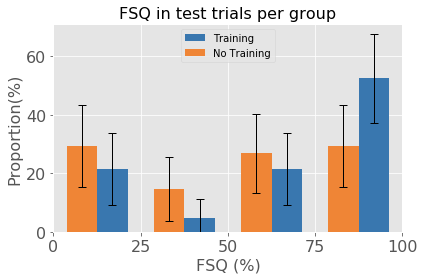

In [476]:
reload(st)
st.create_barplot(df_valid[df_valid.condition == 1], df_valid[df_valid.condition == 0], 'RT_pa_mean', [0, 0.25, 0.5, 0.75,1])


plt.title('FSQ in test trials per group', fontsize=16)
plt.ylabel('Proportion(%)', fontsize=16)
plt.xlabel('FSQ (%)', fontsize=16)
plt.legend(loc='upper center')

plt.xticks(plt.xticks()[0], ['0', '25', '50', '75', '100'], fontsize=16) 
plt.yticks([0,.2,.4,0.6], ['0', '20', '40', '60'], fontsize=16) 

plt.tight_layout()
#plt.savefig('plots/Exp9A/exp9A_TestFSQ.png', dpi=300)



(0.02577368405231173, 0.9045943667120602)


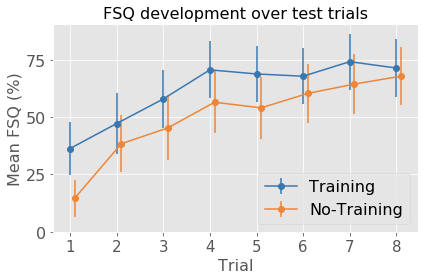

In [475]:
reload(st)
st.print_LC([df_valid[df_valid.condition == 1],df_valid[df_valid.condition == 0]], 'RT_pa_complete', title='', ylabel = 'FSP', xlabel = 'Trial', measure='mean')

plt.title('FSQ development over test trials', fontsize=16)
plt.ylabel('Mean FSQ (%)', fontsize=16)
plt.xlabel('Trial', fontsize=16)
plt.legend(loc='lower right', fontsize=16)

print(plt.ylim())
plt.yticks([0,.25,.5,0.75], ['0', '25', '50', '75'], fontsize=16) 
plt.xticks(fontsize=15)
#plt.plot(1,0.75, marker='*', color= 'black')

plt.tight_layout()
#plt.savefig('plots/Exp9A/exp9A_FSP_LC.png', dpi=300)
